In [1]:
from extract_data import extarct_data
from config.config import config


In [2]:
df = extarct_data('regression').drop(['title','equipement','id','city id','year','index'],axis=1)


In [3]:
#df.columns.to_list()
#df['ville'].value_counts()
display(df)

,price,nb rooms,nb baths,surface area,ville,jour,month,Articles De Toilettage,Ascenseur,Balcon,...,Fer À Repasser,Garage,Machine À Laver,Meublé,Parking,Serviettes,Sécurité,Terrasse,Télévision,WIFI
0,-2.211455,-2.293100,-0.894736,-0.597365,26,14,7,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,-2.230049,-0.483449,0.520454,0.246433,26,4,5,0,1,1,...,0,0,0,1,1,0,1,0,0,0
2,-2.431082,3.107139,0.520454,0.222611,14,1,8,0,1,1,...,0,0,0,0,1,0,1,1,0,0
3,-2.434868,-0.483449,0.520454,0.222611,14,15,6,1,1,1,...,1,0,1,1,1,1,1,1,1,1
4,0.008557,0.905145,0.520454,0.577952,18,15,6,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,-0.259262,-0.483449,0.520454,0.048865,37,18,2,0,1,1,...,0,0,0,1,1,0,1,0,0,0
1266,-0.245107,-0.483449,12.150805,-0.194819,4,14,10,0,1,1,...,0,0,0,0,1,0,1,1,0,0
1267,0.217656,-0.483449,0.520454,0.149687,22,20,10,0,1,1,...,0,0,0,1,1,0,1,0,0,0
1268,-0.346169,-2.293100,-0.894736,-0.281889,26,15,11,0,0,0,...,0,0,1,1,1,0,1,1,0,0


In [4]:
df[config.operation_array].corr()

,price,nb rooms,nb baths,surface area
price,1.000000,0.210319,0.243326,0.443951
nb rooms,0.210319,1.000000,0.330073,0.467571
nb baths,0.243326,0.330073,1.000000,0.345295
surface area,0.443951,0.467571,0.345295,1.000000


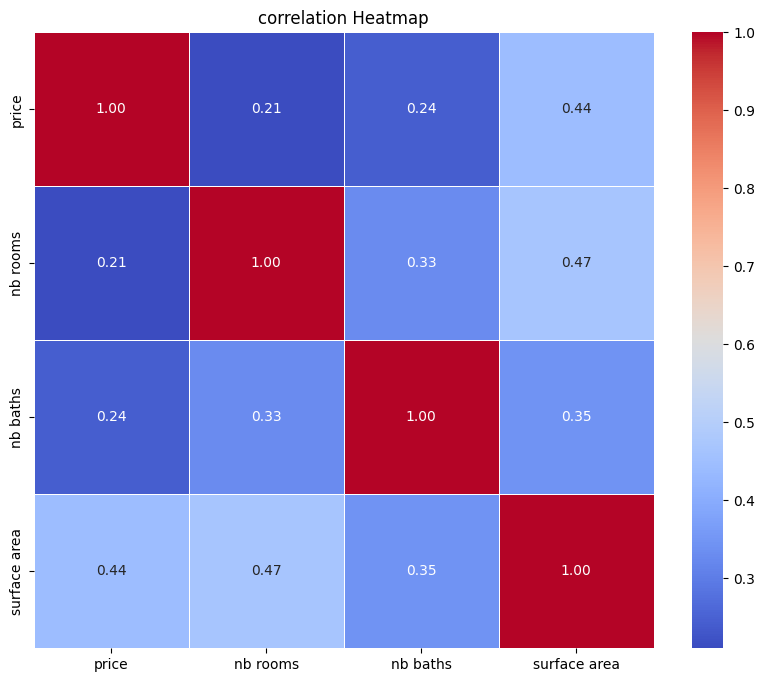

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df[config.operation_array].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

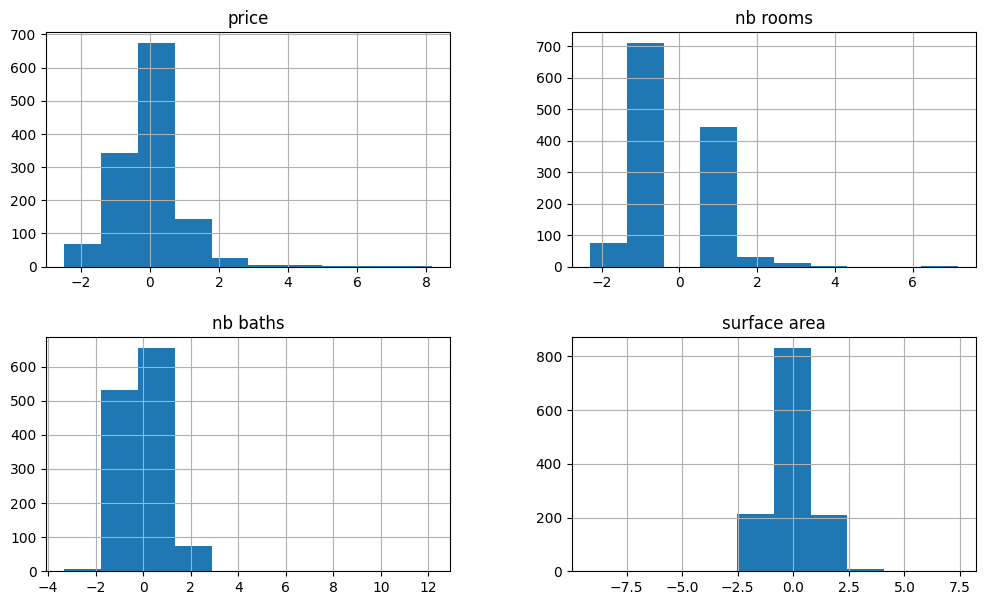

In [6]:
import matplotlib.pyplot as plt 
df[config.operation_array].hist(figsize=(12,7))
plt.show

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x,y = df[[
 'nb rooms',
 'nb baths',
 'surface area',
 'ville'
 
]],df['price']

#display(x)
#display(y)


In [8]:
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

model = LinearRegression(n_jobs=-1)
x_train,x_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2, random_state=42)

model.fit(x_train,y_train)


LinearRegression(n_jobs=-1)

In [9]:
model.score(x_test,y_test)

0.2872242327583119

In [142]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred=model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"R² score on the test set: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

R² score on the test set: 0.287
Mean Squared Error (MSE): 0.585
Intercept: -0.1199261753860677
Coefficients: [ 0.00000000e+00 -1.37544957e-01  1.35497513e-01  5.55761960e-01
 -5.17118828e-03  3.86927383e-03 -1.37428405e-02  6.34050903e-02
  4.74730550e-03 -2.05131250e-03  1.43617270e-01 -3.06343064e-04
  3.91358622e-02 -4.85029175e-03  2.32311914e-04]


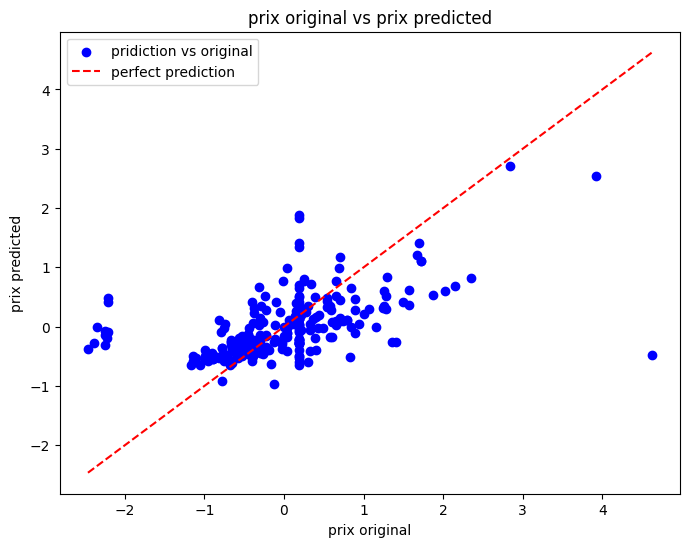

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='pridiction vs original')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='perfect prediction')

plt.xlabel('prix original')
plt.ylabel('prix predicted')
plt.title('prix original vs prix predicted')
plt.legend()

plt.show()

In [144]:
abs(y_test-y_pred)

1214    0.227751
803     0.385802
422     0.404646
1262    0.141763
979     0.329562
          ...   
163     0.491274
486     0.305842
1256    0.180320
221     0.382446
243     0.562053
Name: price, Length: 254, dtype: float64

trying another model (RandomForestRegressor)

In [172]:
from sklearn.ensemble import RandomForestRegressor


x,y = df[[
 'nb rooms',
 'nb baths',
 'surface area',
 'ville',
 'Ascenseur'
 
]],df['price']

X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)





RandomForestRegressor(random_state=42)

In [174]:
_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)

In [147]:
print(f"R² score on the test set: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

R² score on the test set: 0.088
Mean Squared Error (MSE): 0.749


In [148]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators': [100, 300,250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

model = RandomForestRegressor(n_jobs=-1)
grid_model = GridSearchCV(model,param_grid=grid_param,cv=5)
grid_model.fit(x_train,y_train)


/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/ali/Desktop/machine learning /venv/lib/python3.12/site-packages/sklearn/base.py", line 6

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 300, 250]})

In [149]:
grid_model.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 250}

In [150]:
model = grid_model.best_estimator_

In [151]:
model.score(x_test,y_test)

0.3080245501298875

In [152]:
y_pred = model.predict(x_test)


In [153]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"R² score on the test set: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")


R² score on the test set: 0.308
Mean Squared Error (MSE): 0.568


In [154]:
abs(y_test-y_pred)

1214    0.263962
803     0.382048
422     0.186520
1262    0.111218
979     0.023192
          ...   
163     0.316547
486     0.857671
1256    0.235295
221     0.342206
243     1.177166
Name: price, Length: 254, dtype: float64

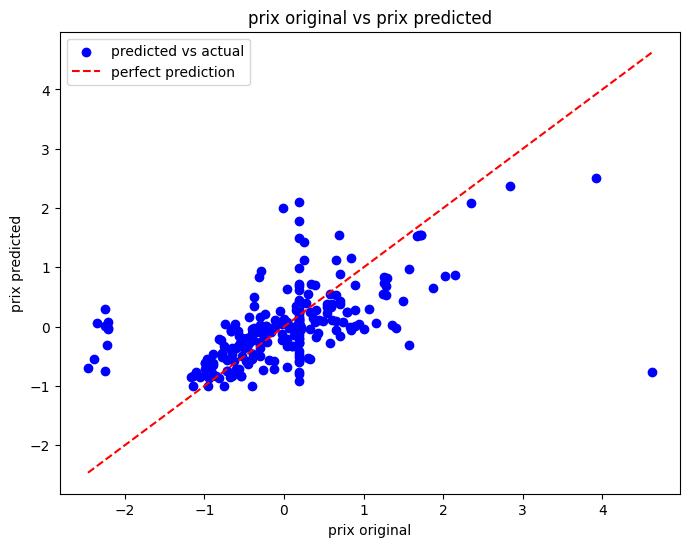

In [175]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='predicted vs actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='perfect prediction')

plt.xlabel('prix original')
plt.ylabel('prix predicted')
plt.title('prix original vs prix predicted')
plt.legend()

plt.show()

another model(XGBoost)

In [192]:
import xgboost as xgb


x,y = df[[
 'nb rooms',
 'nb baths',
 'surface area',
 'ville',
 
]],df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)


model= xgb.XGBRegressor(objective='reg:squarederror', 
                          learning_rate=0.1, 
                          max_depth=5, 
                          n_estimators=100, 
                          subsample=0.8, 
                          colsample_bytree=0.8, 
                          alpha=0.1)

model.fit(x_train,y_train)


XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [193]:
model.score(x_test,y_test)


0.1934483181459168

In [194]:

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")


Mean Squared Error (MSE): 0.662


In [201]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'alpha': [0, 0.1, 0.2]
}
grid_model=GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=1)

grid_model.fit(x_train,y_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.2],
                         'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [203]:
grid_model.best_params_

{'alpha': 0.2,
 'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.9}

In [206]:
model =grid_model.best_estimator_
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}") 

Mean Squared Error (MSE): 0.615


In [207]:
model.score(x_test,y_test)

0.2514013594369645